# **Probelm Statement**
- Predict the chances of admission of a candidate based on different features: `gender, international, gpa, major, race, gmat, work_exp, work_industry`.

- Dataset Source - https://www.kaggle.com/datasets/taweilo/mba-admission-dataset

- The data consists of 10 column and 6194 rows.

---

## **Import necessary modules and load the dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as mysql
from  dotenv.main import load_dotenv
import os
import warnings

warnings.filterwarnings("ignore")
load_dotenv()

True

### Connect with the database

In [3]:
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')
host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')

In [4]:
df = mysql.connect(user = user, password = password, database = database, host = host, port = port)

In [5]:
df = pd.read_sql('SELECT * FROM mba_admission.admission', con = df)

### Show the top 5 rows

In [6]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,
2,3,Female,True,3.30,Business,,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,


### Show the shape of the data

In [7]:
df.shape

(6194, 10)

The data has 6194 rows and 10 features/columns

In [63]:
df.race.unique()

array(['Asian', 'Black', '', 'Hispanic', 'White', 'Other'], dtype=object)

### **Dataset Information:**
- **application_id**: Unique identifier for each application
- **gender**: Sex of the student -> (Male/Female)
- **international**: International student or not -> (True/False)
- **gpa**: Grade Point Average of the student
- **major**: Major of the student -> (business/Humanities/STEM)
- **race**: Race/Ethnicity of the student -> (White/Asian/Black/Hispanic/Other/Null)
- **gmat**: Graduate Management Admission Test score
- **work_exp**: Work experience in years
- **work_industry**: Industry in which the student has work experience -> (Financial Services/ Investment Management/ Technology/ Consulting/ (Nonprofit/Gov)/ (PE/VC)/ Health Care/ Investment Banking/ Retail/ Energy/ CPG/ Real Estate/ Entertainment/ Other)
- **admission**: Admission decision -> (Admitted/Waitlist/Null:Deny)

---

### Things to check:

- Check nulls
- Check duplicates
- Check data-types
- Check number of unique values in each columns
- Check statistics
- Check unique categories in categorical columns

### 1. Check nulls

In [34]:
df.isna().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

In [82]:
df[df['race'] == ''].head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
2,3,Female,True,3.30,Business,,710.0,5.0,Technology,Admit
7,8,Male,True,3.02,Business,,630.0,6.0,Financial Services,
11,12,Male,True,2.85,Humanities,,580.0,4.0,PE/VC,
15,16,Female,True,3.05,Humanities,,710.0,4.0,Consulting,Admit
19,20,Male,True,3.09,Business,,670.0,8.0,Consulting,


> **There are blank values in the dataset in "race" and "admission" column which we can replace with lable as Unknown for race and Rejected for admission column**

### 2. Check duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

> **There are no duplicates in the dataset**

### 3. Check data-types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   object 
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 484.0+ KB


> **There are 4 numeric and 6 categorical features in the dataset**

### 4. Check number of unique values in each columns

In [11]:
df.nunique().sort_values(ascending=False)

application_id    6194
gpa                101
gmat                22
work_industry       14
work_exp             9
race                 6
admission            3
major                3
gender               2
international        2
dtype: int64

> **In categorical features, `work_industry` has highest number of categories followed by `race`**

### 5. Check statistics

In [12]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


> **Insights :**

1. **GPA**:
   - Range: 2.65 to 3.77
   - Average: 3.25
   - Standard Deviation (std): 0.15
   - Interpretation: A low standard deviation indicates that the GPA values are close to the mean, meaning the data is not widely spread out.

2. **GMAT**:
   - Range: 570 to 780
   - Average: 651
   - Standard Deviation (std): 49
   - Interpretation: Similarly, a standard deviation of 49 suggests that the GMAT scores are relatively close to the mean, indicating low spread.

3. **Work Experience**:
   - Range: 1 to 9 years
   - Average: 5 years
   - Standard Deviation (std): 1.03
   - Interpretation: A standard deviation of 1.03 also indicates that the work experience values are close to the mean, showing low variability.

### 6. Check unique categories in categorical columns

In [13]:
cat_colns = df.select_dtypes(include='object').columns

for col in cat_colns:
    print(f'{col} : {df[col].unique()} \n')

gender : ['Female' 'Male'] 

international : ['False' 'True'] 

major : ['Business' 'Humanities' 'STEM'] 

race : ['Asian' 'Black' '' 'Hispanic' 'White' 'Other'] 

work_industry : ['Financial Services' 'Investment Management' 'Technology' 'Consulting'
 'Nonprofit/Gov' 'PE/VC' 'Health Care' 'Investment Banking' 'Other'
 'Retail' 'Energy' 'CPG' 'Real Estate' 'Media/Entertainment'] 

admission : ['Admit' '' 'Waitlist'] 



---

### **Data Exploration**

In [14]:
# students with highest gpa
students_with_highest_gpa = df[df['gpa'] == df['gpa'].max()].value_counts().sum()

# see how many students have gpa greater than 3.5
students_with_higher_gpa = df[df['gpa'] > 3.5].shape[0]

# see how many students have gpa less than 3.5
students_with_lower_gpa = df[df['gpa'] < 2.8].shape[0]

print('Number of students with highest GPA: ', students_with_highest_gpa)
print('')
print(f'Number of students with GPA greater than 3.5: {students_with_higher_gpa}')
print('')
print(f'Number of students with GPA less than 2.8: {students_with_lower_gpa}')


Number of students with highest GPA:  1

Number of students with GPA greater than 3.5: 290

Number of students with GPA less than 2.8: 9


In [15]:
# students with highest gmat score
highest_gmat_score_students = df[df['gmat'] == df['gmat'].max()].value_counts().sum()

# see how many students have gmat score greater than 700
students_with_higher_gmat_score = df[df['gmat'] > 700].shape[0]

# see how many students have gmat score less than 500
students_with_lower_gmat_score = df[df['gmat'] < 600].shape[0]

print(f'Number of students with highest GMAT score: {highest_gmat_score_students}')
print('')
print(f'Number of students with GMAT score greater than 700: {students_with_higher_gmat_score}')
print('')
print(f'Number of students with GMAT score less than 600: {students_with_lower_gmat_score}')

Number of students with highest GMAT score: 65

Number of students with GMAT score greater than 700: 910

Number of students with GMAT score less than 600: 894


In [16]:
# see how many students have gpa greater than 3.5 and gmat score greater than 700
students_with_high_gpa_high_gmat = df[(df['gpa'] > 3.5) & (df['gmat'] > 700)].shape[0]

# see how many students have gpa less than 3.5 and gmat score less than 500
students_with_low_gpa_low_gmat = df[(df['gpa'] < 2.8) & (df['gmat'] < 600)].shape[0]

print(f'Number of students with GPA greater than 3.5 and GMAT score greater than 700: {students_with_high_gpa_high_gmat}')
print('')
print(f'Number of students with GPA less than 2.8 and GMAT score less than 500: {students_with_low_gpa_low_gmat}')

Number of students with GPA greater than 3.5 and GMAT score greater than 700: 160

Number of students with GPA less than 2.8 and GMAT score less than 500: 7


In [17]:
# what is the gmat score of student who has the highest gpa
gmat_score_of_students_with_max_gpa = df[df['gpa'] == df['gpa'].max()]['gmat'].tolist()[0]

print(f'Student who has highest gpa has a gmat score of {gmat_score_of_students_with_max_gpa}')

Student who has highest gpa has a gmat score of 780.0


In [18]:
# gender distribution
df.gender.value_counts()

gender
Male      3943
Female    2251
Name: count, dtype: int64

In [19]:
# high and low gpa by gender
total_male_students = df[df['gender'] == 'Male'].shape[0]
total_female_students = df[df['gender'] == 'Female'].shape[0]

male_with_low_gpa = df[(df['gpa'] < 3) & (df['gender'] == 'Male')].shape[0]
male_with_high_gpa = df[(df['gpa'] > 3.5) & (df['gender'] == 'Male')].shape[0]
female_with_low_gpa = df[(df['gpa'] < 3) & (df['gender'] == 'Female')].shape[0]
female_with_high_gpa = df[(df['gpa'] > 3.5) & (df['gender'] == 'Female')].shape[0]

male_with_low_gpa_percentage = (male_with_low_gpa / total_male_students) * 100
male_with_high_gpa_percentage = (male_with_high_gpa / total_male_students) * 100
female_with_low_gpa_percentage = (female_with_low_gpa / total_female_students) * 100
female_with_high_gpa_percentage = (female_with_high_gpa / total_female_students) * 100

print(f'Percentage of male students with GPA less than 3: {male_with_low_gpa_percentage:.2f}%')
print(f'Percentage of male students with GPA greater than 3.5: {male_with_high_gpa_percentage:.2f}%', end='\n\n')

print(f'Percentage of female students with GPA less than 3: {female_with_low_gpa_percentage:.2f}%')
print(f'Percentage of female students with GPA greater than 3.5: {female_with_high_gpa_percentage:.2f}%')


Percentage of male students with GPA less than 3: 4.39%
Percentage of male students with GPA greater than 3.5: 4.57%

Percentage of female students with GPA less than 3: 4.80%
Percentage of female students with GPA greater than 3.5: 4.89%


In [20]:
# high and log gmat by gender
total_male_students = df[df['gender'] == 'Male'].shape[0]
total_female_students = df[df['gender'] == 'Female'].shape[0]


male_with_low_gmat = df[(df['gmat'] < 600) & (df['gender'] == 'Male')].shape[0]
male_with_high_gmat = df[(df['gmat'] > 700) & (df['gender'] == 'Male')].shape[0]
female_with_low_gmat = df[(df['gmat'] < 600) & (df['gender'] == 'Female')].shape[0]
female_with_high_gmat = df[(df['gmat'] > 700) & (df['gender'] == 'Female')].shape[0]


male_with_low_gmat_percentage = (male_with_low_gmat / total_male_students) * 100
male_with_high_gmat_percentage = (male_with_high_gmat / total_male_students) * 100
female_with_low_gmat_percentage = (female_with_low_gmat / total_female_students) * 100
female_with_high_gmat_percentage = (female_with_high_gmat / total_female_students) * 100

print(f'Percentage of male students with GMAT less than 600: {male_with_low_gmat_percentage:.2f}%')
print(f'Percentage of male students with GMAT greater than 700: {male_with_high_gmat_percentage:.2f}%', end='\n\n')

print(f'Percentage of female students with GMAT less than 600: {female_with_low_gmat_percentage:.2f}%')
print(f'Percentage of female students with GMAT greater than 700: {female_with_high_gmat_percentage:.2f}%')

Percentage of male students with GMAT less than 600: 13.97%
Percentage of male students with GMAT greater than 700: 15.09%

Percentage of female students with GMAT less than 600: 15.24%
Percentage of female students with GMAT greater than 700: 13.99%


> **Insights :**
- Number of students with highest GPA:  1
- Number of students with GPA greater than 3.5: 290
- Number of students with GPA less than 2.8: 9
- Number of students with highest GMAT score: 65
- Number of students with GMAT score greater than 700: 910
- Number of students with GMAT score less than 600: 894
- Number of students with GPA greater than 3.5 and GMAT score greater than 700: 160
- Number of students with GPA less than 2.8 and GMAT score less than 500: 7
- Slightly more female students have GPA greater than 3.5, however, more male students have GMAT score greater than 700  

---

### **Data Visualization**

### 1. Count Plot for categorical features

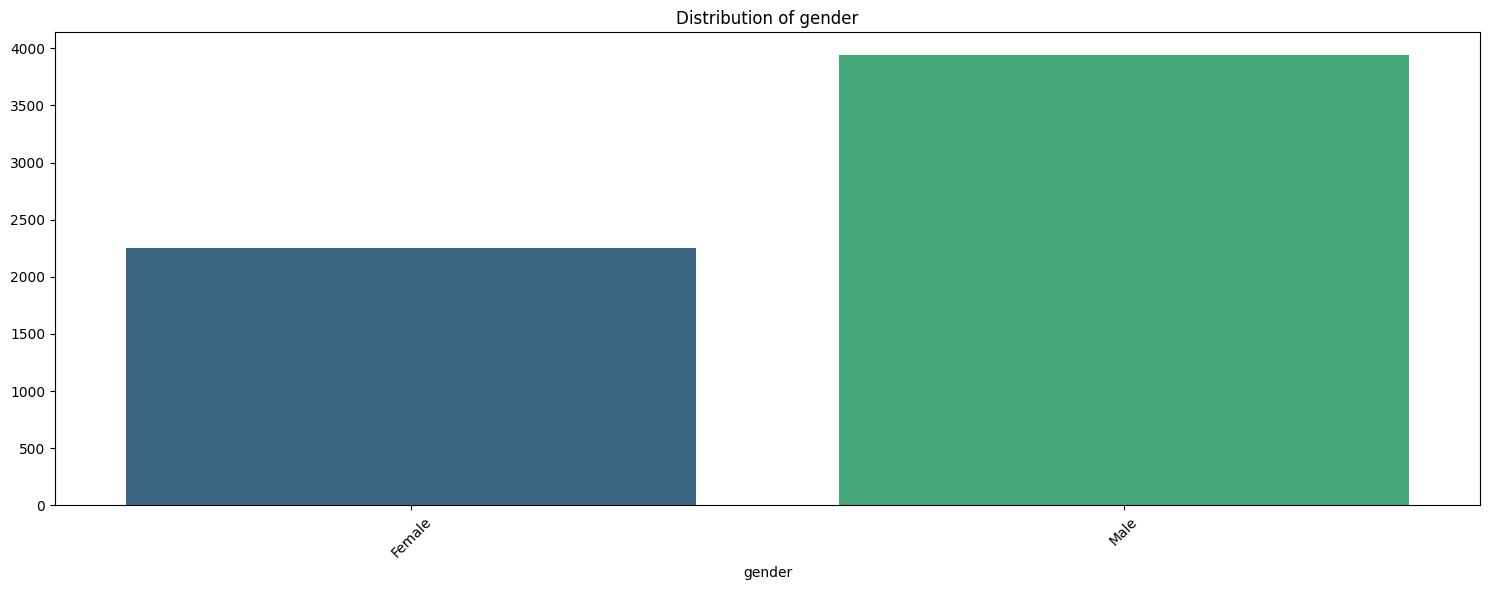

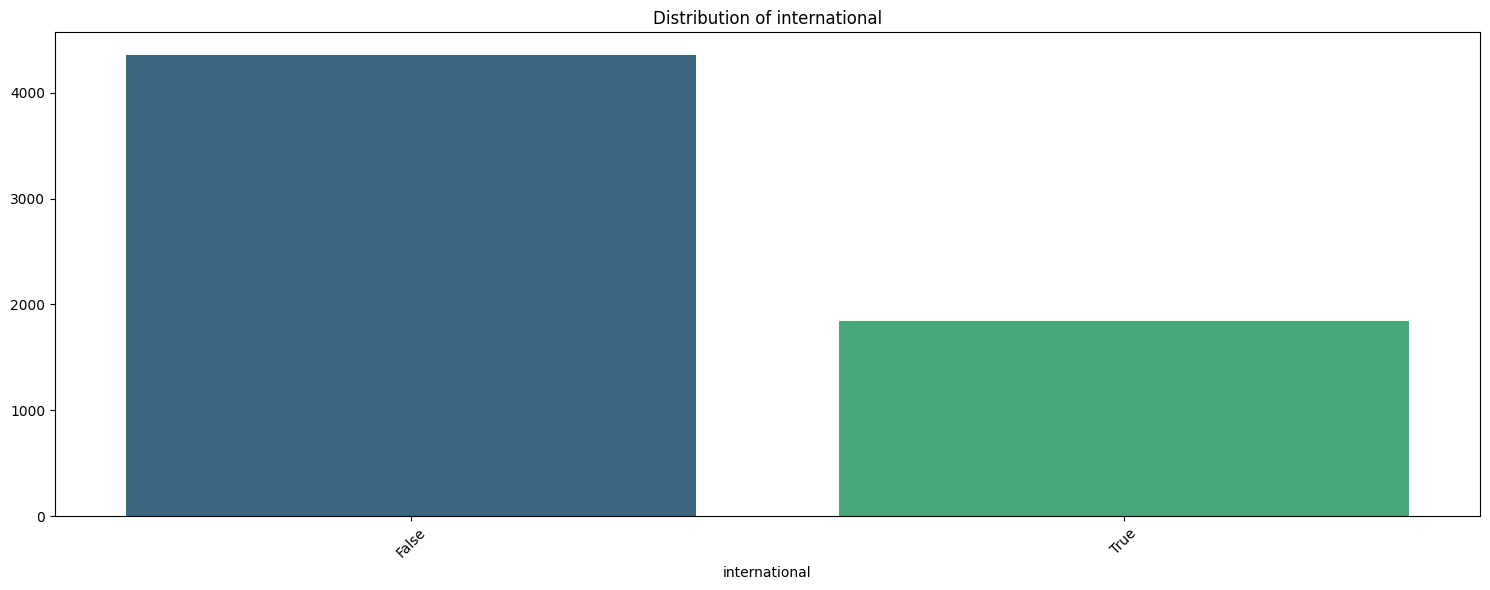

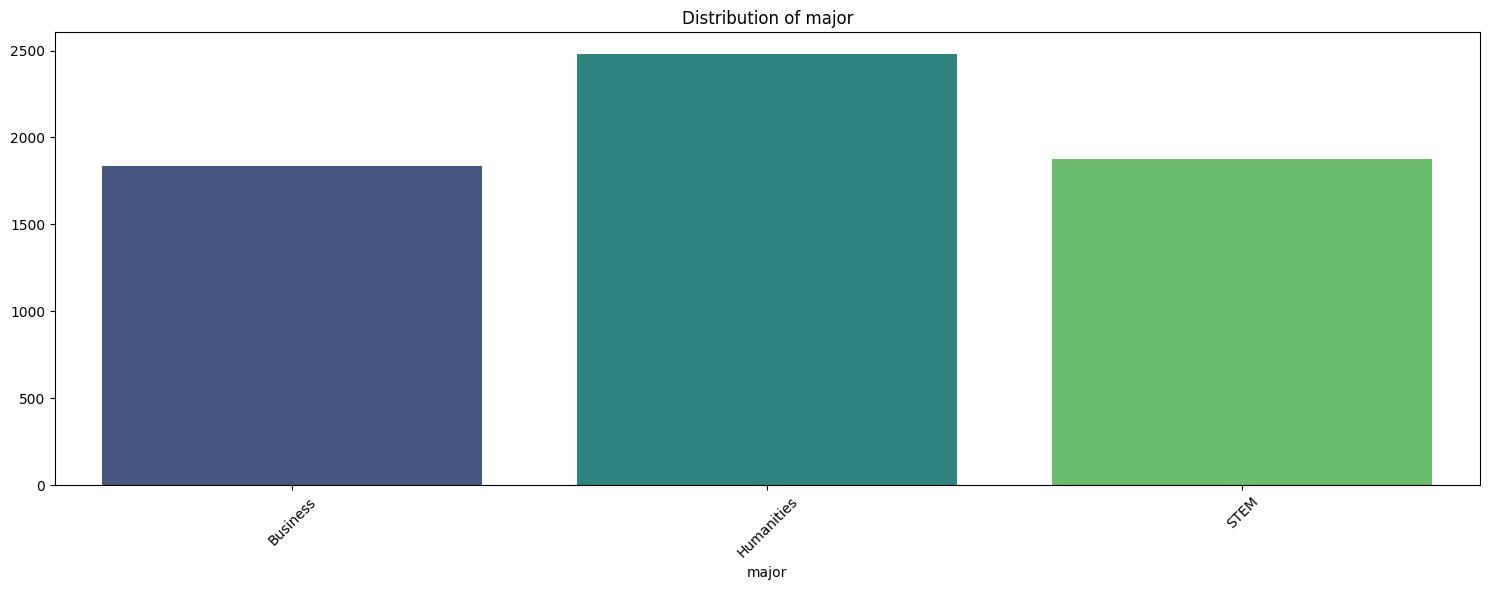

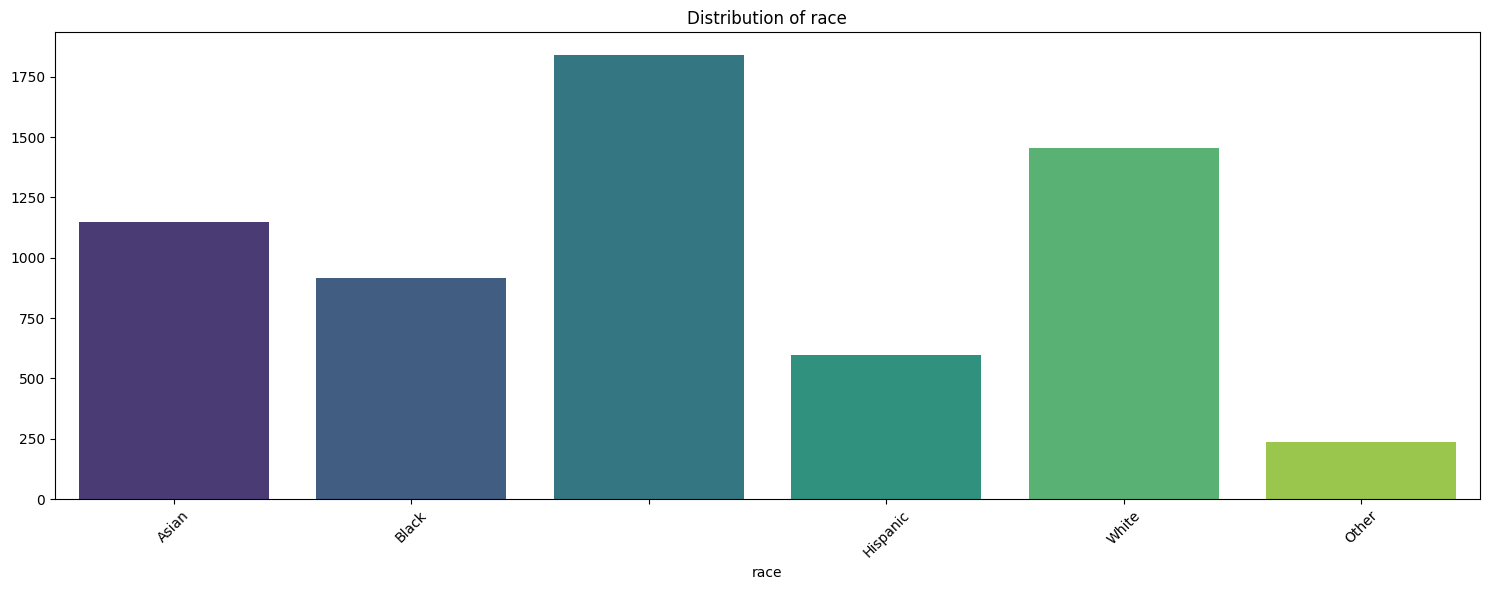

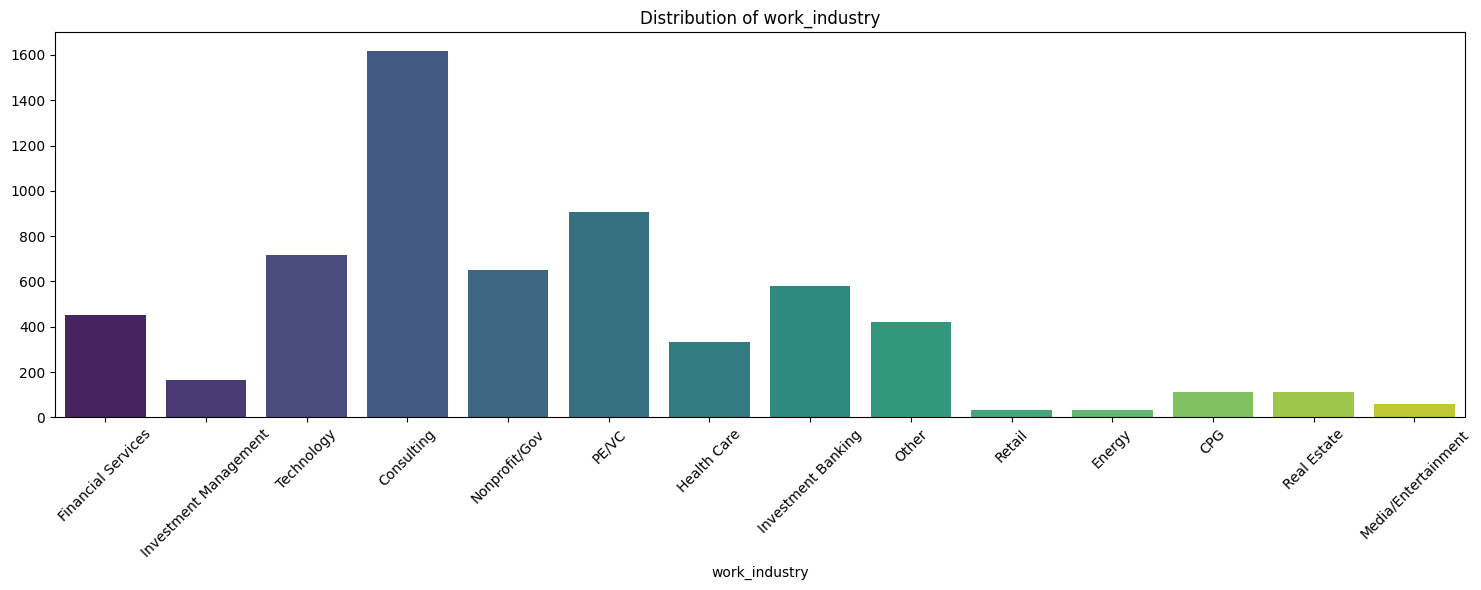

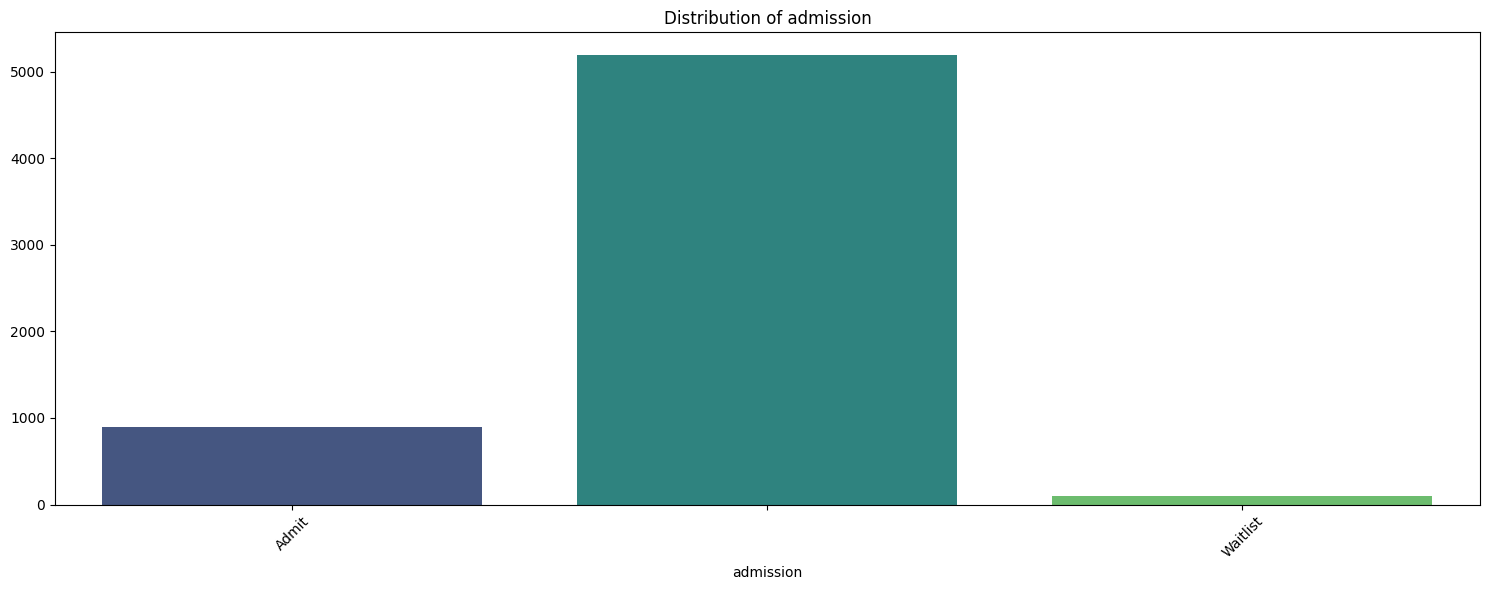

In [77]:
categorical_features = [col for col in df.columns if df[col].dtype == 'O']
for col in categorical_features:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.xticks(rotation=45)
    plt.ylabel('')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

> **Insights :**

1. **Gender Distribution**:
   - **Unbalanced**: More male students than female students.

2. **International Status**:
   - **Unbalanced**: More domestic students than international students.

3. **Major Distribution**:
   - **Unbalanced**: More students majoring in Humanities.
   - **Balanced**: Almost equal number of students majoring in STEM and Business.

4. **Race Distribution**:
   - **Unbalanced**: 
     - Most students' race is **Null/Unknown**.
     - Followed by **White**, **Asian**, and **Black**.
     - Very few students are **Hispanic** and **Other**.

5. **Work Industry Distribution**:
   - **Unbalanced**:
     - Most students work in **Consulting**.
     - Followed by **PE/VC** and **Technology**.
     - Very few students work in **Media/Entertainment**, **Retail**, and **Energy**.

6. **Admission Status**:
   - **Unbalanced**:
     - Most students are **Null:Rejected**.
     - Followed by **Accepted** and **Waitlisted**.

### 2. Box plot to check the distribution of numerical column and outliers

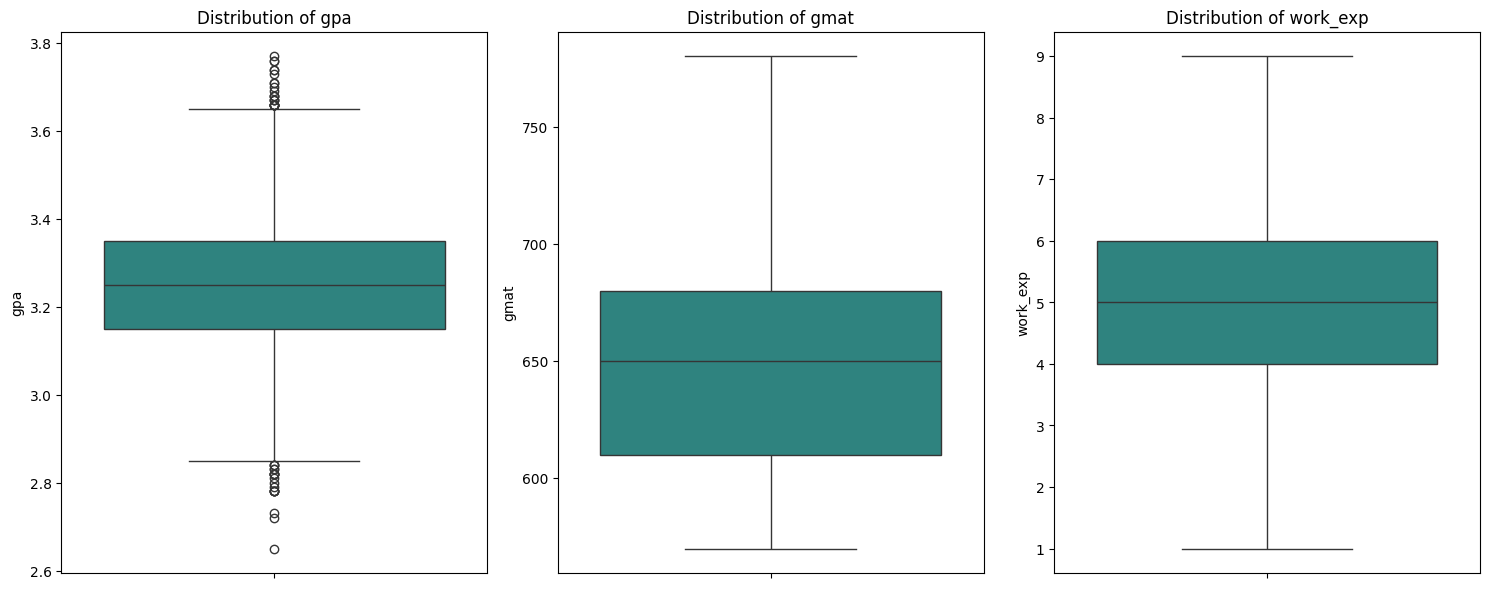

In [95]:
numerical_features = [col for col in df.columns if df[col].dtype != 'O' and col != 'application_id']
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 6))
for i, col in enumerate(numerical_features):
    sns.boxplot(y=col, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


> Insights:
- Students generally score GPA between 3 and 3.3.
- Students generally score GMAT between 620 and 680.
- Students generally have work experience between 4 and 6 years.
- There are some outliers in the GPA column.

### 3. GPA, GMAT and Work Experience by "gender"

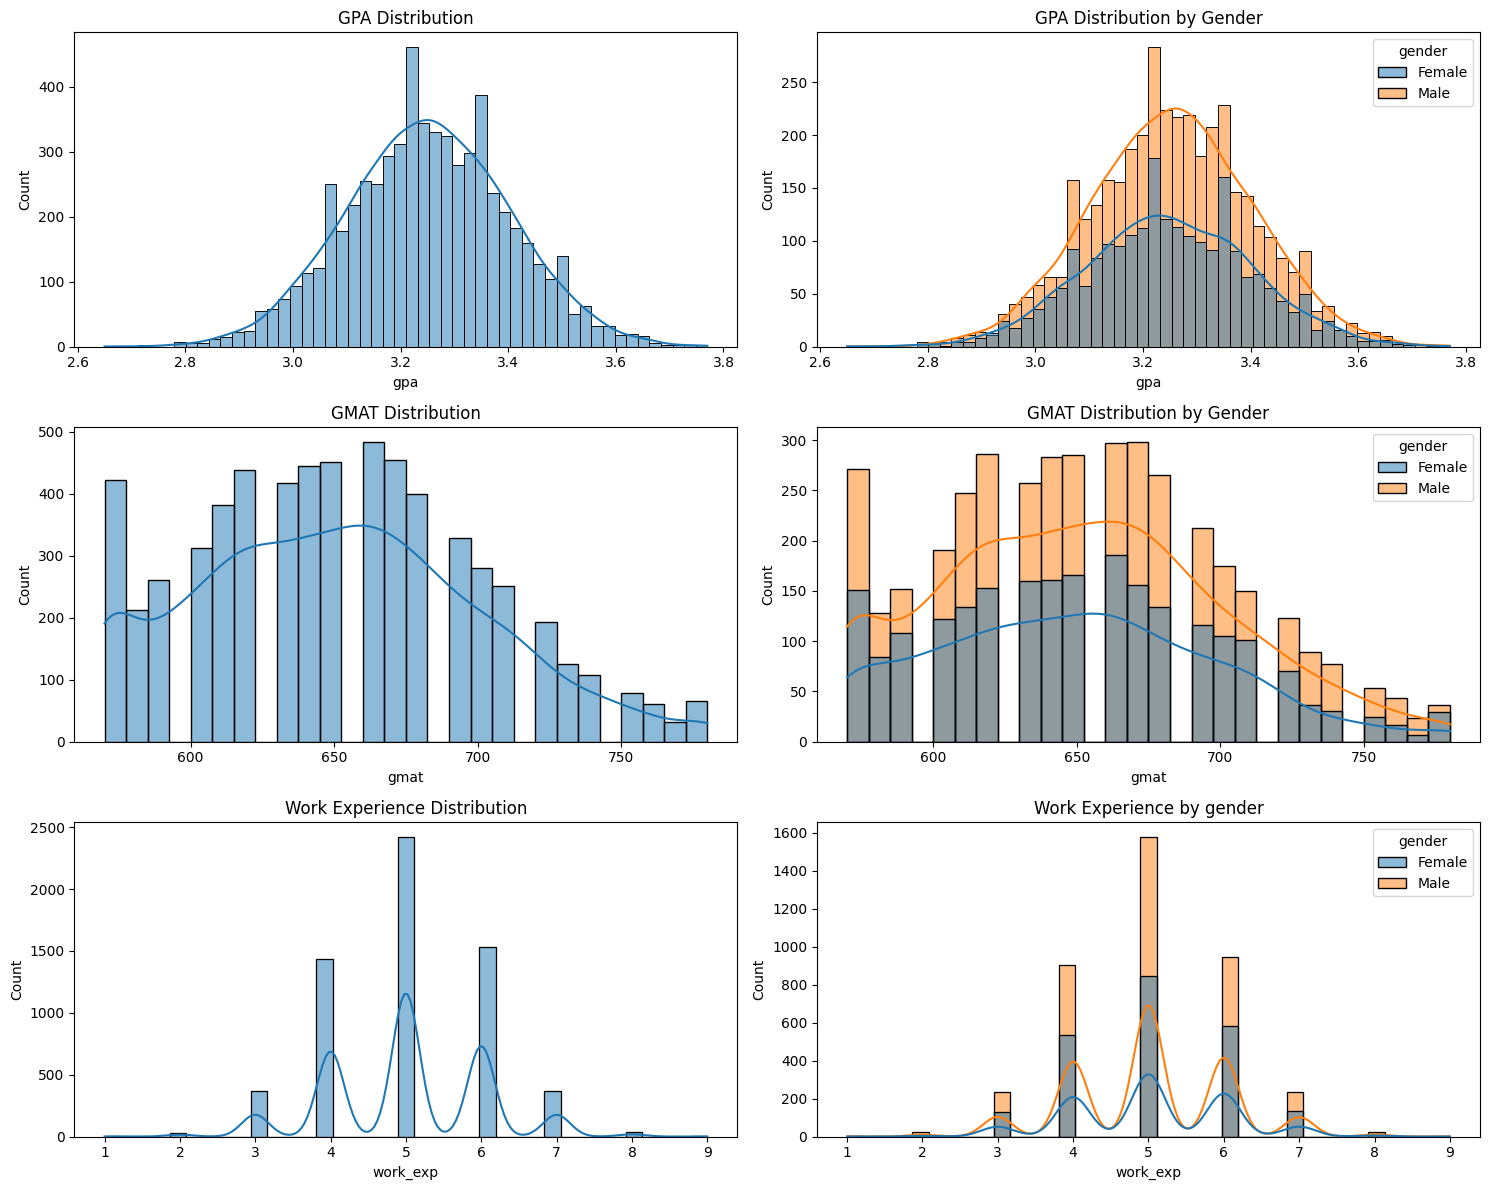

In [110]:
# create histogram and kde plot for gpa by gender
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # Corrected to 1 row and 2 columns
sns.histplot(data=df, x='gpa', kde=True, ax=axes[0,0])
axes[0,0].set_title('GPA Distribution')

sns.histplot(data=df, x='gpa', hue='gender', kde=True, ax=axes[0,1])
axes[0,1].set_title('GPA Distribution by Gender')

sns.histplot(data=df, x='gmat', kde=True, ax=axes[1,0])
axes[1,0].set_title('GMAT Distribution')

sns.histplot(data=df, x='gmat', hue='gender', kde=True, ax=axes[1,1])
axes[1,1].set_title('GMAT Distribution by Gender')

sns.histplot(data=df, x='work_exp', kde=True, ax=axes[2,0])
axes[2,0].set_title('Work Experience Distribution')

sns.histplot(data=df, x='work_exp' , hue='gender', kde=True, ax=axes[2,1])
axes[2,1].set_title('Work Experience by gender')

plt.tight_layout()
plt.show()

> Insights:
1. **GPA Data**:
   - **Slightly-Skewed Distribution**: The GPA data is slightly right-skewed, with most students having a GPA between 3.0 and 3.5.
   - **Gender Comparison**: Both male and female students have the same average GPA, suggesting no significant gender difference in academic performance based on GPA.

2. **GMAT Data**:
   - **Right-Skewed Distribution**: The GMAT data is skewed to the right, meaning that a larger number of students have higher GMAT scores.
   - **Gender Comparison**: The average GMAT score is the same for both male and female students, indicating no significant gender difference in GMAT scores.

3. **Work Experience Data**:
   - **Multi-Modal Distribution**: The data appears to be multi-modal, suggesting multiple peaks and indicating different groups of students with varying levels of work experience.
   - **Gender Distribution**: The data also seems to be multi-modal when broken down by gender, suggesting multiple groups of students with different levels of work experience for both genders.

### 4. GPA and GMAT Score breakdown by categorical features

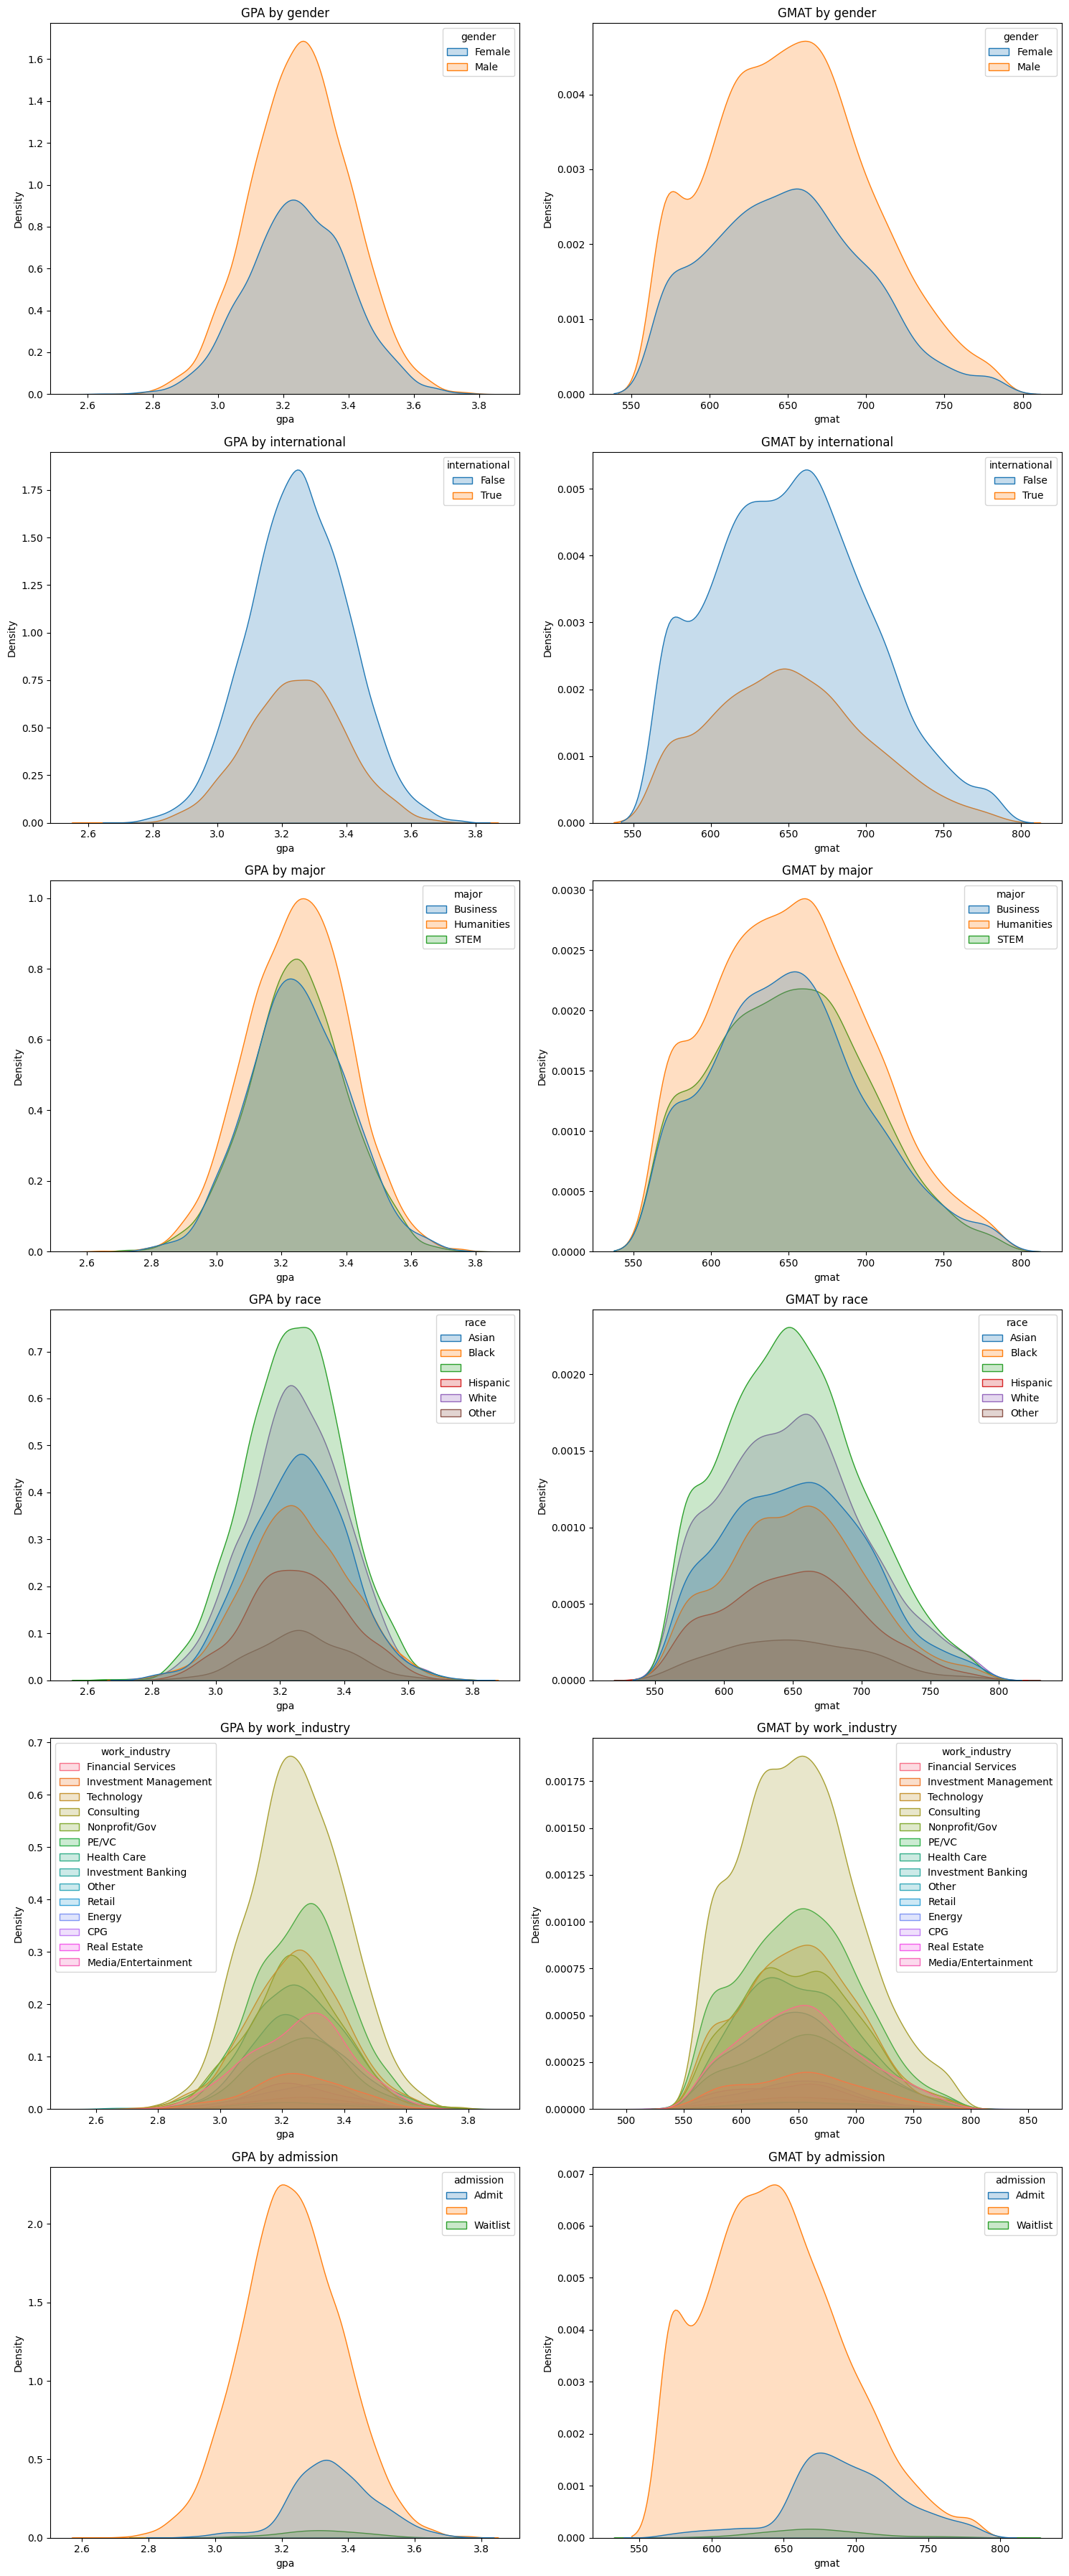

In [134]:
# distribution of gpa and gmatt score by Major column
def create_kde():
    fig, axes = plt.subplots(len(categorical_features), 2, figsize=(15, 6 * len(categorical_features)))
    for i, col in enumerate(categorical_features):
        sns.kdeplot(data=df, x='gpa', hue=col, fill=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'GPA by {col}')

        sns.kdeplot(data=df, x='gmat', hue=col, fill=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'GMAT by {col}')

    plt.tight_layout()
    plt.show()

create_kde()

> **Insights:**

1. **GPA Score:** For every categorical feature, GPA is slightly right-skewed. However, when broken down by each category, no specific distribution pattern is found.

2. **GMAT Score:** For every categorical feature, GMAT is fully right-skewed with multiple peaks. Similarly, no specific insights are found when broken down by each category.

### 5. Check correlation for numerical columns

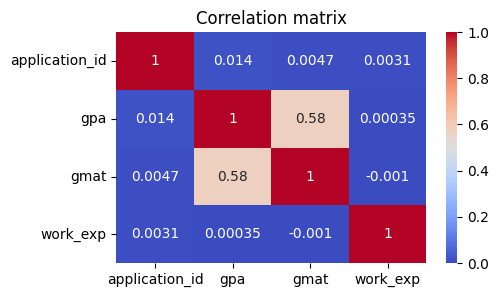

In [136]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Correlation matrix')
plt.show()

> **Insights:**
- GPA and GMAT are positively correlated.
- No strong correlation found for other features.

### 6. Checking distribution of categories using pie chart

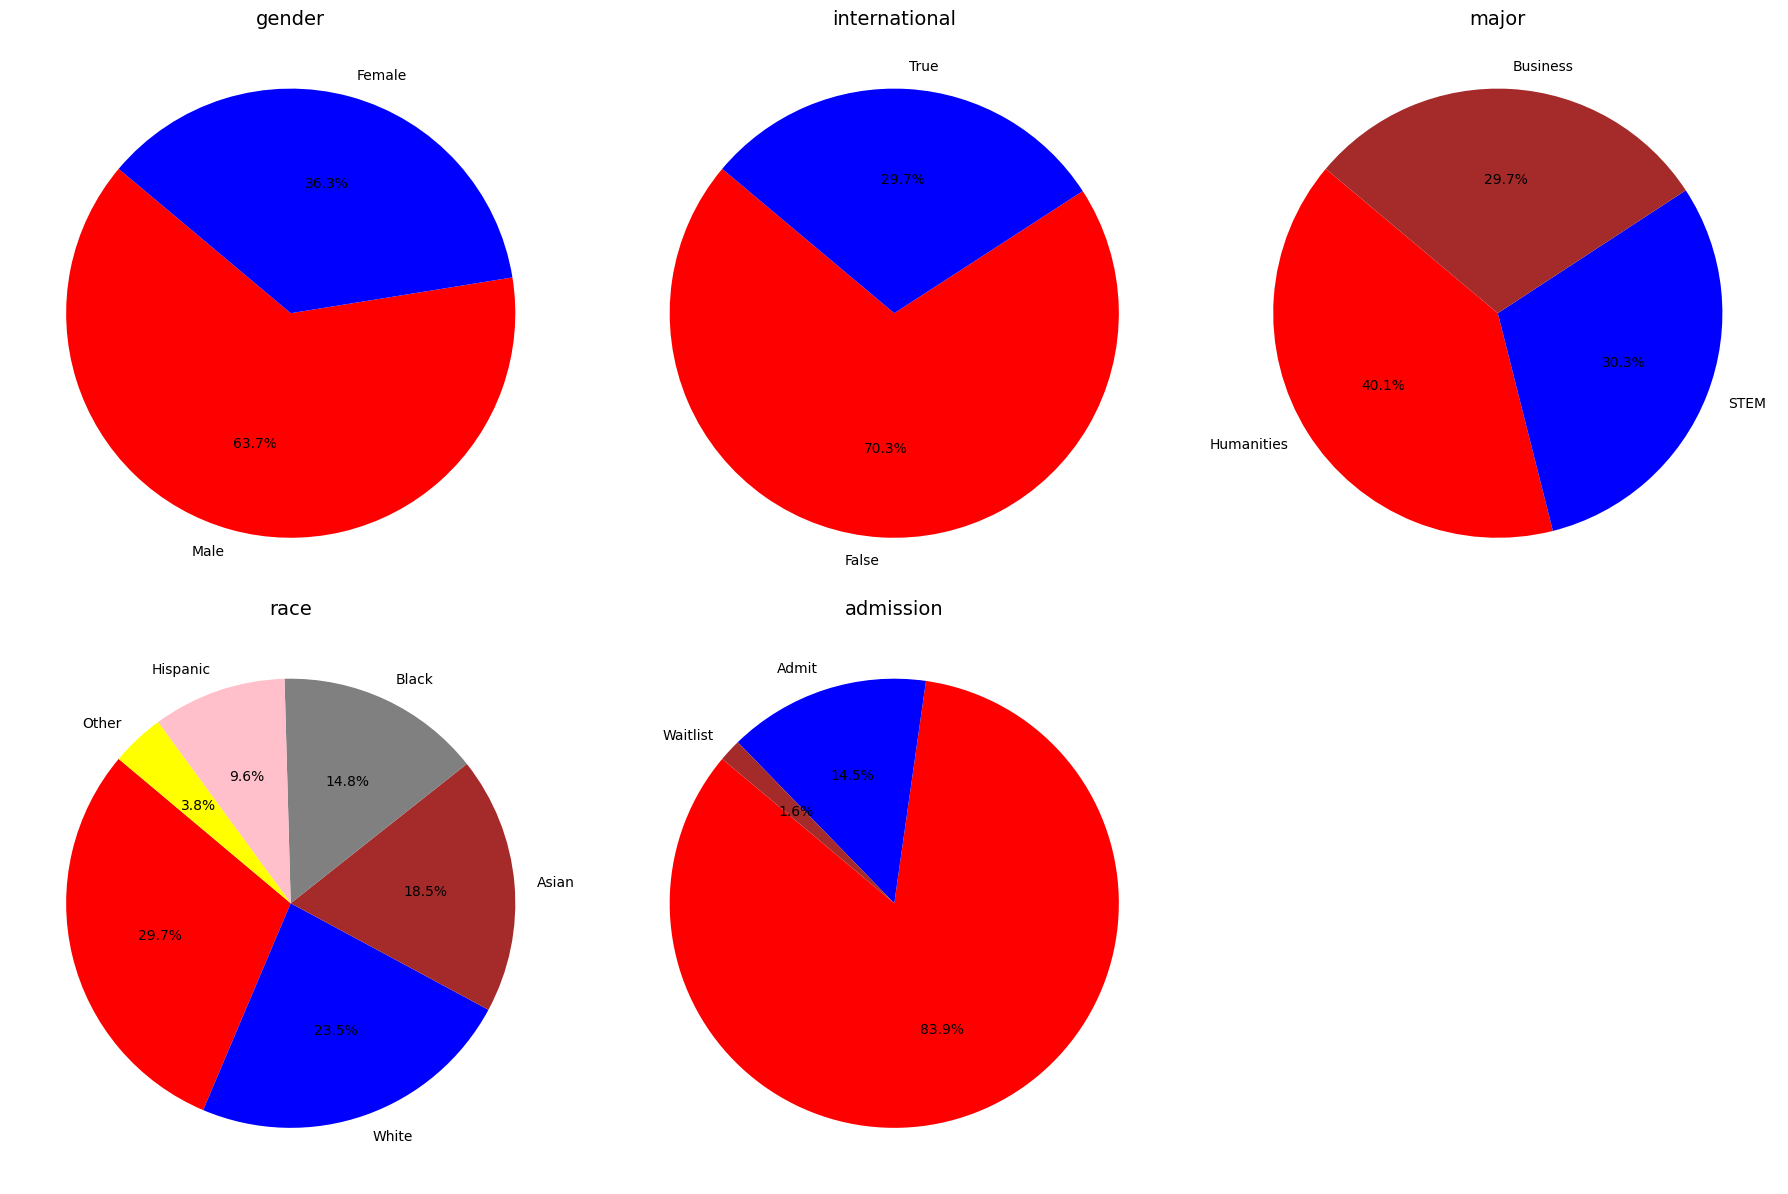

In [162]:
plt.figure(figsize=(18, 12))
columns = categorical_features
titles = categorical_features

colors = [
    ['red', 'blue'],  # gender
    ['red', 'blue'],  # international
    ['red', 'blue', 'brown'],  # major
    ['red', 'blue', 'brown', 'gray', 'pink', 'yellow'],  # race
    ['red', 'blue', 'brown', 'gray', 'pink', 'yellow', 'purple', 'orange', 'green', 'black', 'white', 'cyan', 'magenta', 'olive'],  # work_industry
    ['red', 'blue', 'brown']  # admission
]

subplot_index = 1

for i, (col, title, color) in enumerate(zip(columns, titles, colors)):
    if col != 'work_industry':
        plt.subplot(2, 3, subplot_index)
        size = df[col].value_counts()
        labels = size.index
        plt.pie(size, labels=labels, colors=color, autopct='%1.1f%%', startangle=140)
        plt.title(title, fontsize=14)
        subplot_index += 1

plt.tight_layout()
plt.show()


### 7. Pair plot for detailed view

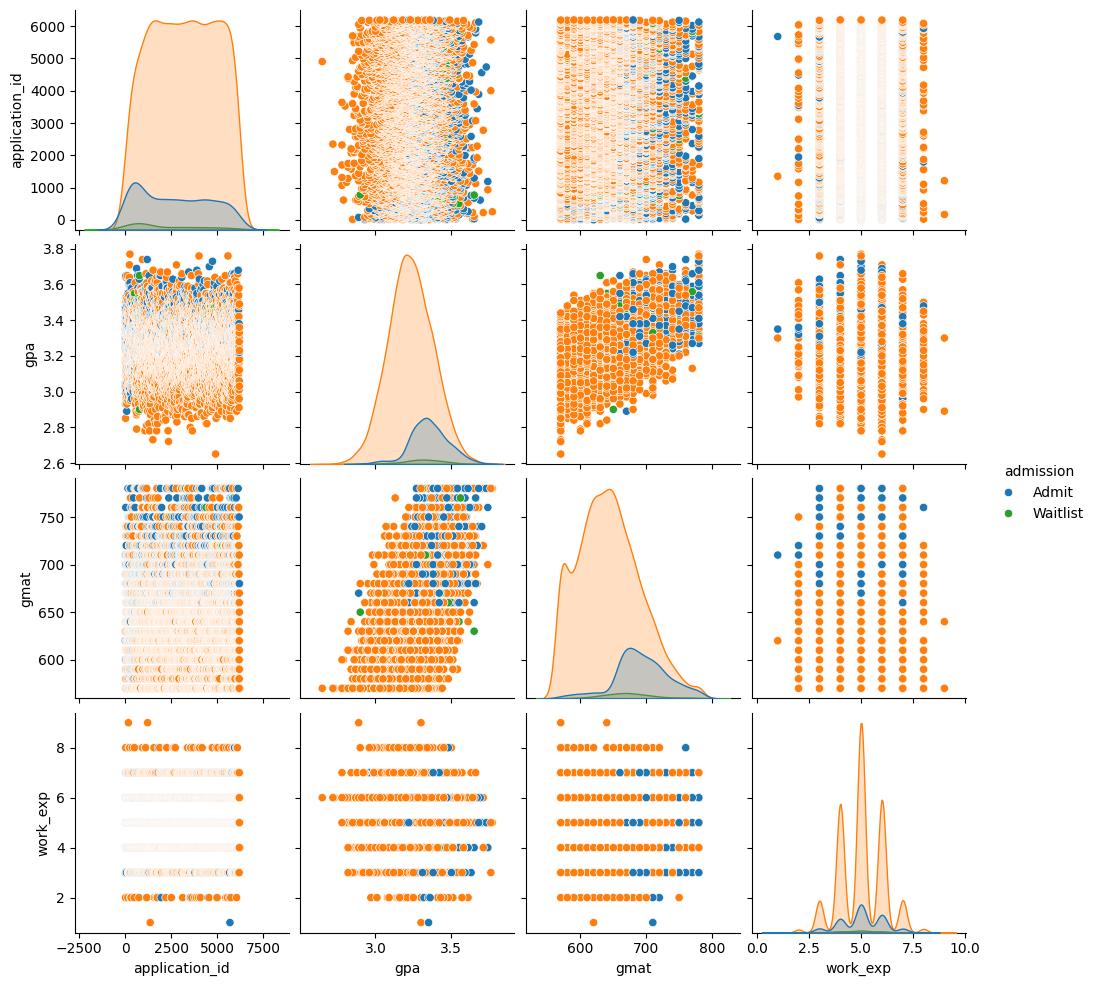

In [168]:
sns.pairplot(df, hue='admission')
plt.show()

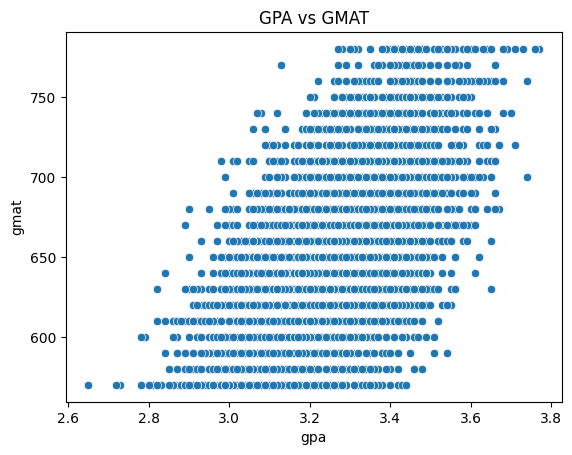

In [169]:
sns.scatterplot(x='gpa', y='gmat', data=df)
plt.title('GPA vs GMAT')
plt.show()

> **Insights :**
- From above visualizations, there is no linear relationship between admission and other features

### 8. Relation between admission and other features

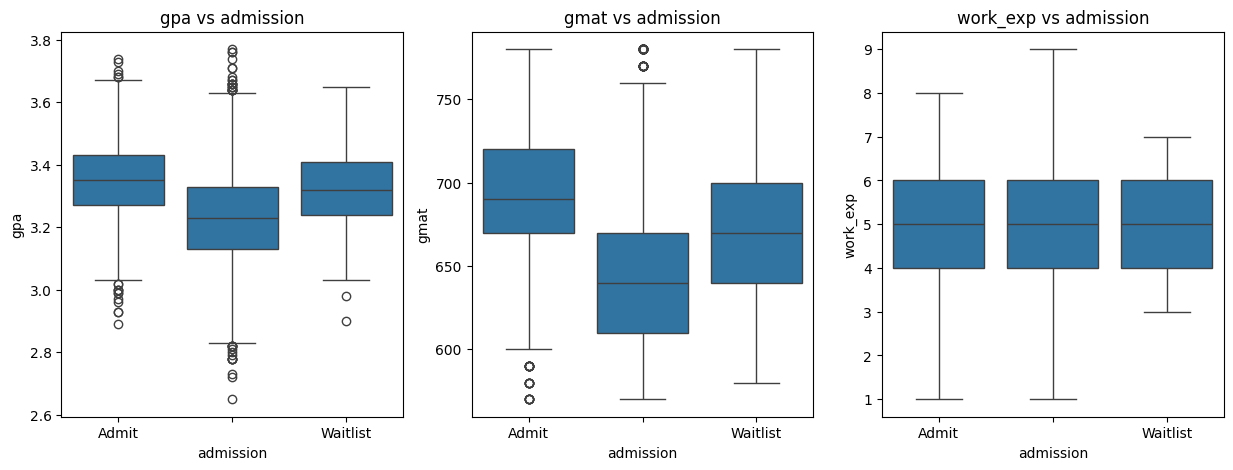

In [174]:
# boxplot for gpa, gmat and work_exp by admission
columns = ['gpa', 'gmat', 'work_exp']
target = 'admission'

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(columns):
    sns.boxplot(x=target, y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs {target}')

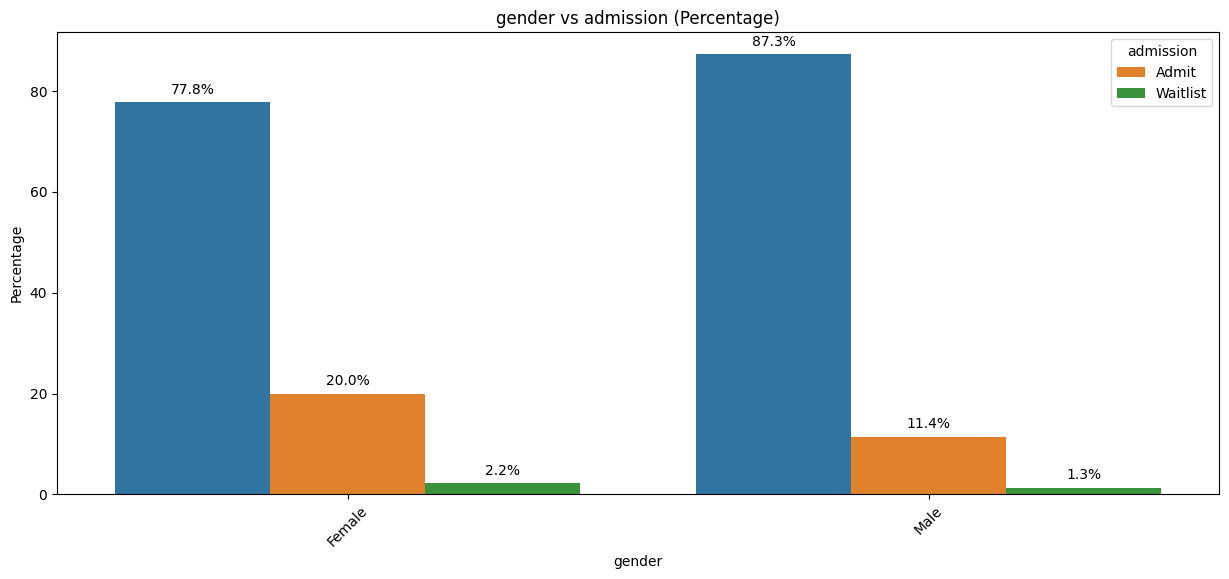

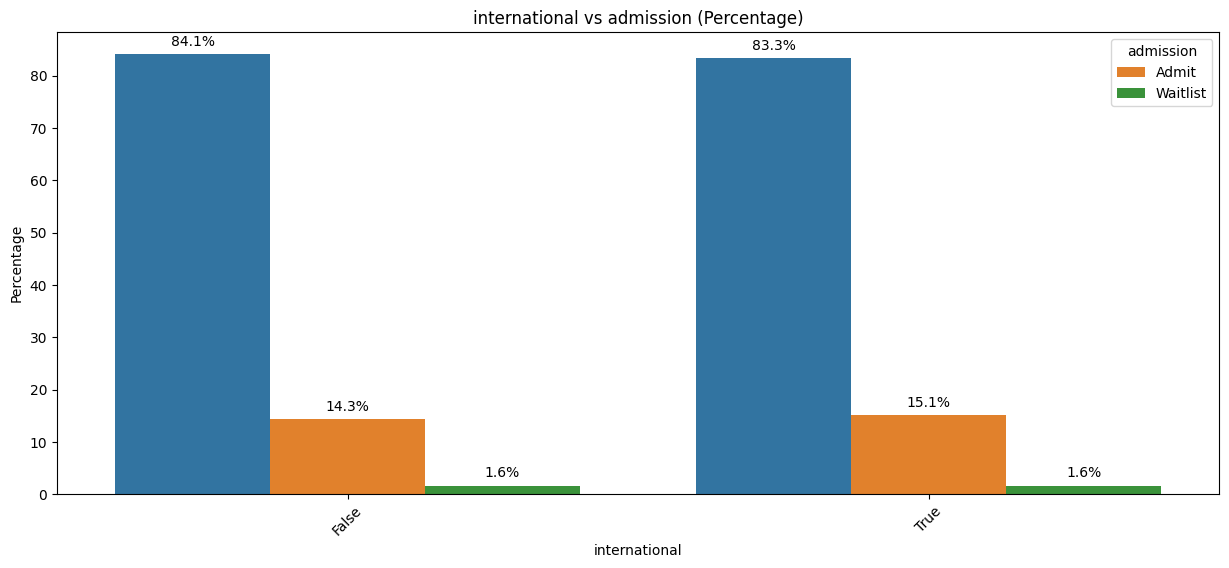

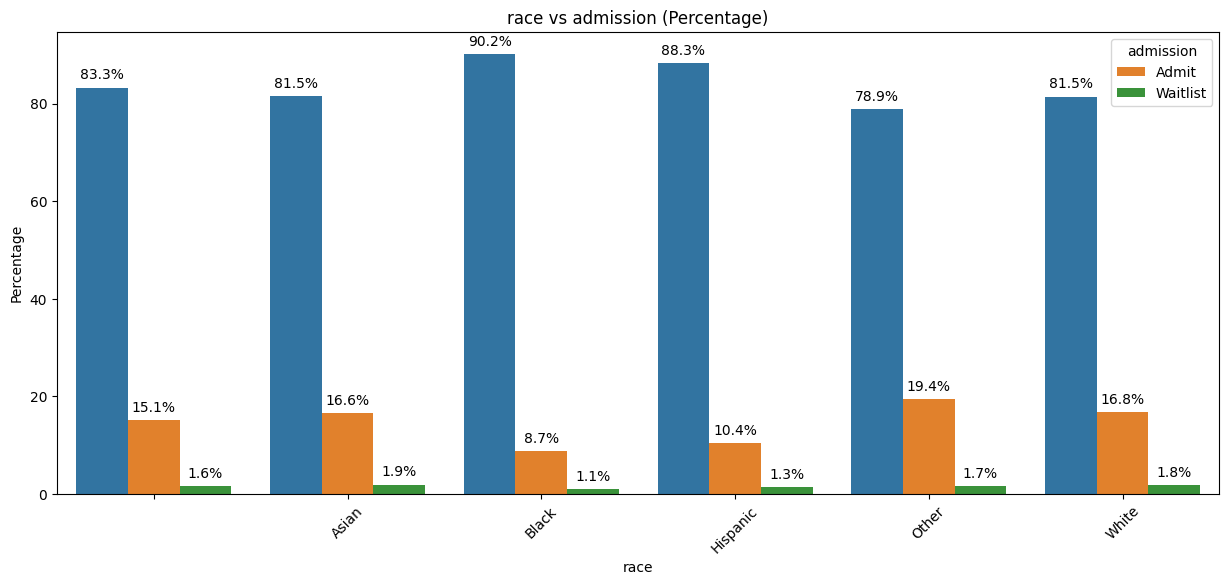

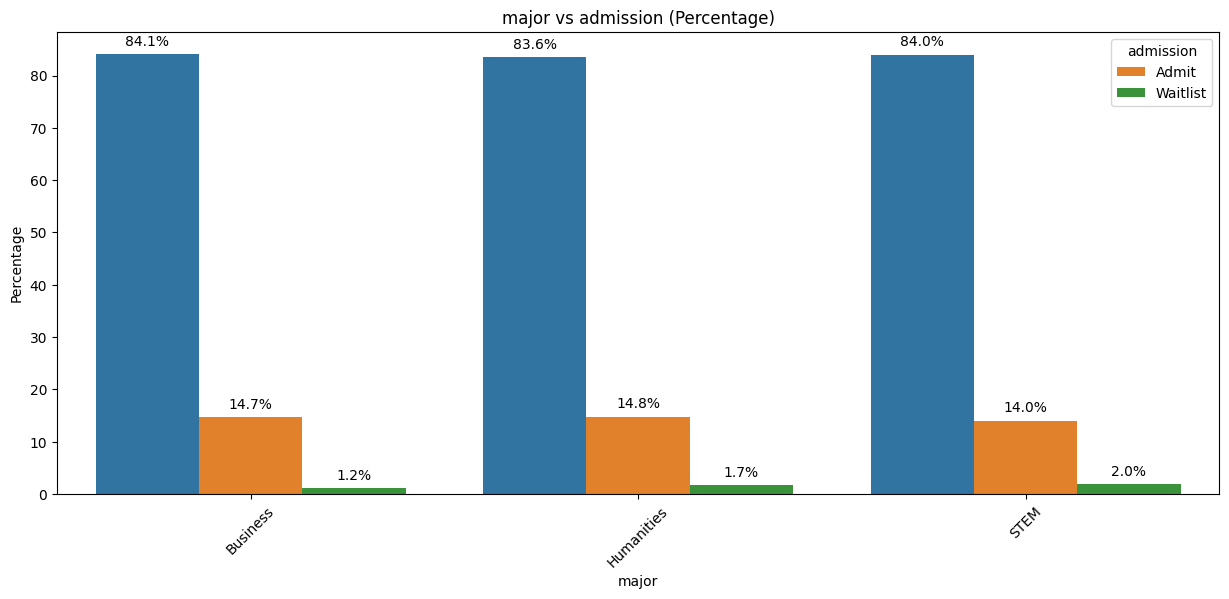

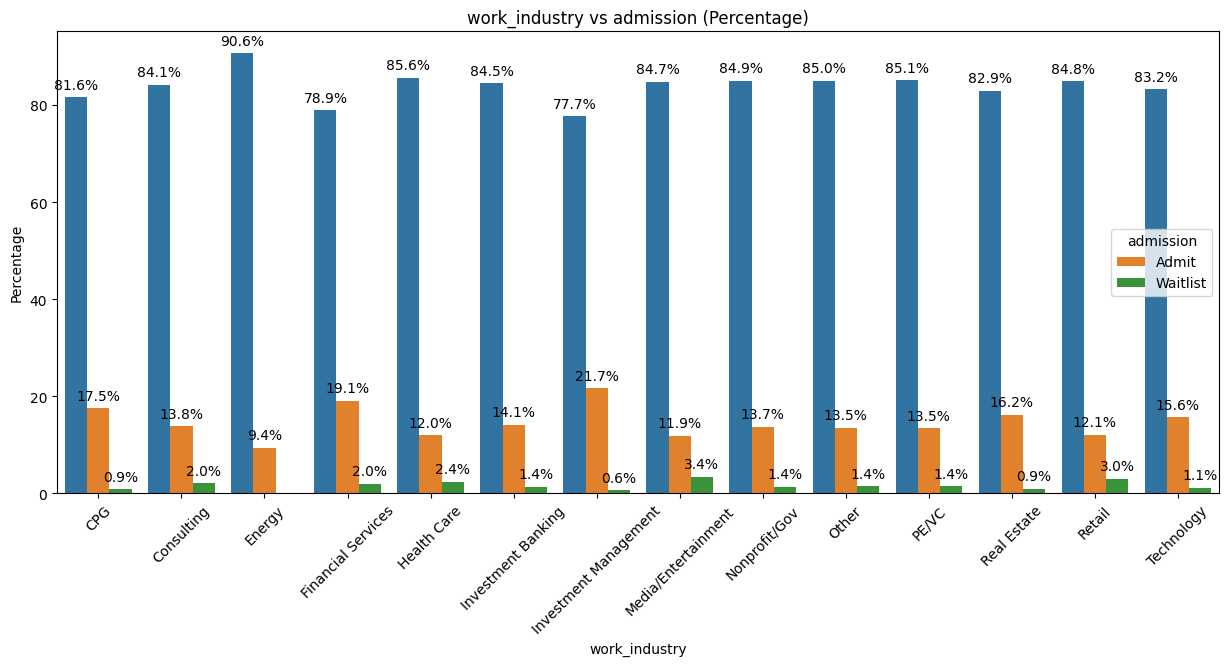

In [186]:
columns = ['gender', 'international', 'race', 'major', 'work_industry']
target = 'admission'

for col in columns:
    plt.figure(figsize=(15, 6))
    count_data = df.groupby([col, target]).size().reset_index(name='count')
    total_counts = count_data.groupby([col])['count'].transform('sum')
    count_data['percentage'] = (count_data['count'] / total_counts) * 100

    ax = sns.barplot(x=col, y='percentage', hue=target, data=count_data)
    plt.title(f'{col} vs {target} (Percentage)')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')

    # Add labels above the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with height greater than zero
            ax.annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points')

    plt.show()

---

> **Conclusion:**

1. **Highly Imbalanced Dataset:**
    - The target feature is highly imbalanced -> Rejected >> Admitted >> Waitlisted.

2. **GPA vs Admission:**
    - GPA seems to be a factor for admission, as the median GPA for admitted students is higher than that of students on the waitlist or who are rejected.

3. **GMAT vs Admission:**
    - GMAT seems to be a factor for admission, as admitted students tend to have a higher median GMAT score (about 700) compared to those on the waitlist (around 660) and rejected (around 630).

4. **Work Experience vs Admission:**
    - Similar median work experience (around 5 years) for admitted and waitlisted students, indicating it may not be a strong differentiating factor compared to GPA and GMAT scores.

5. **Gender vs Admission:**
    - Females are generally more likely to get admitted compared to males.

6. **International vs Admission:**
    - Whether a student is international or domestic, there is the same chance of getting admitted.

7. **Race vs Admission:**
    - Students in the "Other" category are more likely to get admitted, followed by White, Asian, and Null.
    - Black and Hispanic students are less likely to get admitted.

8. **Major vs Admission:**
    - Similar percentage of admission (around 14%) for all major students, indicating it may not be a strong differentiating factor.

9. **Work Industry vs Admission:**
    - Students working in Investment Management are more likely to get admitted, followed by Financial Services and Consulting.
    - Students working in Energy, Media/Entertainment, and Retail are less likely to get admitted.